# Defining The Question.

## a) Specifying the Question

Develop a multi-class classification model to classify news content according to their specific categories specified.

The model can be used by Swahili online news platforms to automatically group news according to their categories and help readers find the specific news they want to read. In addition, the model will contribute to a body of work ensuring that Swahili is represented in apps and other online products in future.


## b) Defining the Metric for Success

This project will be successful when:

1)We develop a multi-class classification model to classify news content according to their specific categories specified.

2)The model achieves atleast 90% accuracy


## c) Understanding the context

Swahili is spoken by 100-150 million people across East Africa.
News contributes to education, technology, and economic growth of a country, and news in local languages plays an important cultural role in many Africa countries. In the modern age, African languages in news and other spheres are at risk of being lost as English becomes the dominant language in online spaces.


## d) Recording the Experimental Design

The following are the experimental design i took in order to complete this project:

1. Loading the datasets
2. Understanding features and target variables

3. Data Cleaning
4. WordCloud
5. Label Encoding
6. Word Embedding
7. Building Model

## e) Data Relevance

The dataset describes 5151 rows of news from different sources in Tanzania.These news are in 5 different news categories;

Kitaifa (National)

Kimataifa (International)

Biashara (Business)

Michezo (Sports)

Burudani (Entertainment)


Dataset Source
Description: https://zindi.africa/hackathons/swahili-news-classification-challenge/data.

Dataset link: [Swahili News Classification](https://drive.google.com/drive/folders/1LNlPGUzKI0apblUVa3xQlGtrc0gYkyKZ?usp=sharing)

## Introduction

This google colaboratory entails an anlysis on how we can use deep learning on Natural Language Processing (NLP) to classify Daily News as either

Kitaifa (National)

Kimataifa (International)

Biashara (Business)

Michezo (Sports)

Burudani (Entertainment)

The best application of this machiene learning model would be in the writing of daily news papers. Writing news papers must be tasky from typing the information to classfying it as whether it suits to be in the sports category, international news category among many others. This model then seeks to ease such a task by helping in classification once the information is keyed in by easily indenifity he relevant category of the information typed.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize

import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

In [ ]:
train.head()

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [ ]:
test.head()

,swahili_id,content
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,"MKUU wa Wilaya ya Bahi, Mkoani Dodoma, Mwanah..."
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,"MWISHONI mwa wiki hii, Timu ya Soka ya Taifa,..."
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,THAMANI ya mauzo ya bidhaa za Afrika Masharik...
3,00868eeee349e286303706ef0ffd851f39708d37,MENEJA Mawasiliano na Utetezi wa asasi ya AGP...
4,00a5cb12d3058dcf2e42f277eee599992db32412,"WAZIRI wa Kilimo, Japhet Hasunga amesema seri..."


# Understanding Features and Target Variables

In [ ]:
train['category'].unique()

array(['Kitaifa', 'Biashara', 'michezo', 'Kimataifa', 'Burudani'],
      dtype=object)

In [ ]:
train.shape

(5151, 3)

In [ ]:
train.dtypes

,0
id,object
content,object
category,object


# Checking for NULL values

In [ ]:
train.isnull().any()

,0
id,False
content,False
category,False


# Countplot of Target Variable(Category)

<Axes: xlabel='count', ylabel='category'>

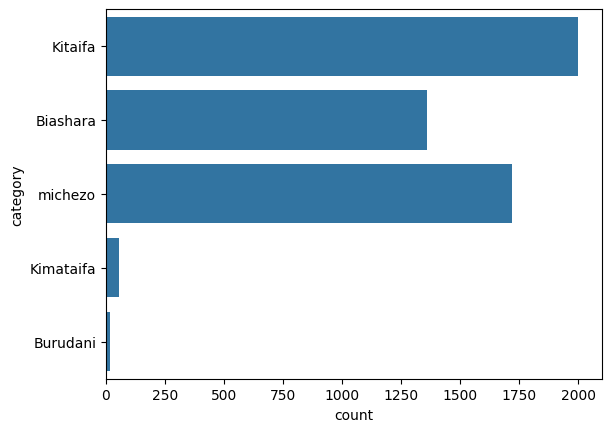

In [ ]:
sns.countplot(train.category)

In [ ]:
train['News_length'] = train['content'].str.len()
print(train['News_length'])

0       1584
1       1317
2       2610
3       1404
4       2247
        ... 
5146    6742
5147    2348
5148    3014
5149    1216
5150    1889
Name: News_length, Length: 5151, dtype: int64


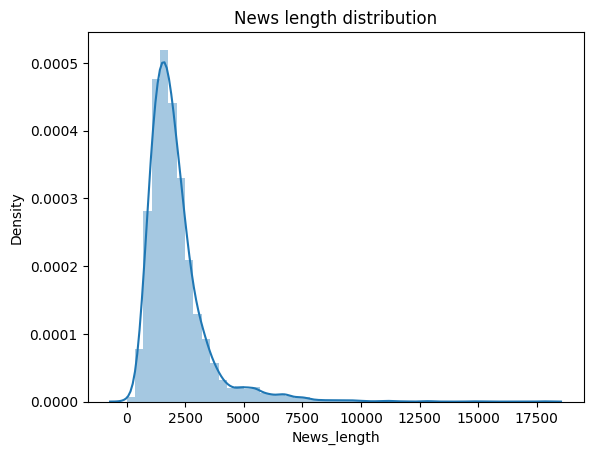

In [ ]:
sns.distplot(train['News_length']).set_title('News length distribution');


# Data Cleaning

Removing the special characters

Removing Punctuations and Stopwords

In [ ]:
train['content']=train['content'].str.lower()
train['content']=train['content'].str.replace("[^a-zA-Z]"," ") # removes everyting except alphabet (small and caps)



In [ ]:
train.head()

,id,content,category,News_length
0,SW0,serikali imesema haitakuwa tayari kuona amani...,Kitaifa,1584
1,SW1,"mkuu wa mkoa wa tabora, aggrey mwanri amesiti...",Biashara,1317
2,SW10,serikali imetoa miezi sita kwa taasisi zote z...,Kitaifa,2610
3,SW100,kampuni ya mchezo wa kubahatisha ya m-bet ime...,michezo,1404
4,SW1000,watanzania wamekumbushwa kusherehekea sikukuu...,Kitaifa,2247


In [ ]:
# Import and set up NLTK
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download all necessary NLTK data
nltk.download('all')  # This will take a minute but will ensure you have everything needed

# Import tokenizer
from nltk.tokenize import word_tokenize

# Your tokenization code
word = []
for i in train['content']:
    word.append(word_tokenize(i))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [ ]:
# creating swahili stopwords list
filter_sent=[]
stopwords_swahili=["akasema","alikuwa","amesema","alisema","ambayo","ambapo","ambao","baada","basi","bila","cha","chini","hadi","hapo","hata",
                   "hivyo","hiyo","huku","huo","ili","ilikuwa","juu","kama","karibu","katika","kila",
                   "kima","kisha","kubwa","kutoka","kutokana","kwani","kuwa","kwa","kwamba","kwenda","kwenye","la",
                   "lakini","mara","mdogo","mimi","mkubwa","mmoja","moja","muda","mwenye","na",
                   "naye","ndani","ng","ni","nini","nonkungu","pamoja","pia","sana","sasa","sauti",
                   "tafadhali","tena","tu","vile","wa","wakati","wake","walikuwa","wao","watu","wengine",
                   "wote","ya","yake","yangu","yao","yeye","yule","za","zaidi","zake"]
for i in word:
    l=[]
    for j in i:
        if j not in stopwords_swahili:
            l.append(j) # This method appends an element to the end of the list
    filter_sent.append(' '.join(l))

In [ ]:
train['content']=filter_sent

In [ ]:
train.tail()

,id,content,category,News_length
5146,SW993,rais john magufuli ameendelea kung ’ ara siasa...,Kitaifa,6742
5147,SW994,kampeni inayohimiza watafi ti kuandika upya hi...,Kitaifa,2348
5148,SW996,"matukio mapya malaria 1,000 jamii , yamepungua...",Kitaifa,3014
5149,SW997,imeelezwa hakuna sheria yoyote inayokataza taa...,Kitaifa,1216
5150,SW999,akizungumza kutiwa saini makubaliano hayo jana...,Biashara,1889


# WordCloud

A wordcloud is an image composed of words used in a particular text or subject in wich size of each word indicates its frequency or importance of that particular word.

In [ ]:
#function to create wordcloud
def create_wordcloud(words):  # takes input as string
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

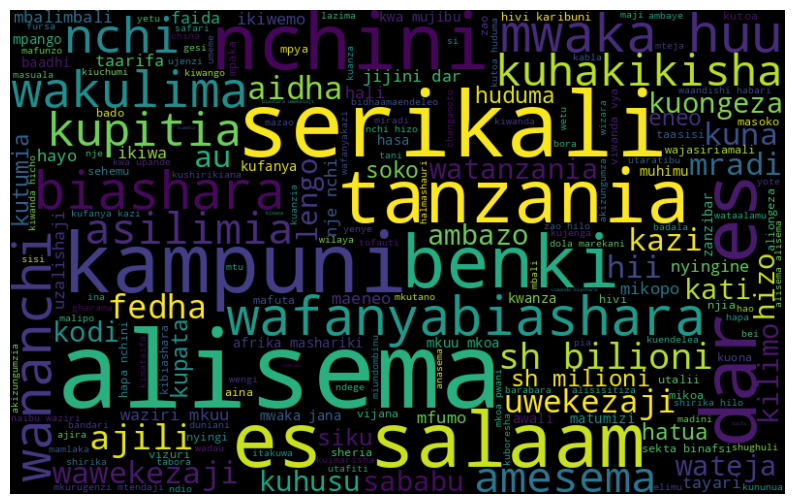

In [ ]:
# wordcloud for category Biashara
subset=train[train.category=="Biashara"]
text=subset.content.values # list of sentences
words =" ".join(text)# convert list of sentences into a paragraph of sentences
create_wordcloud(words)

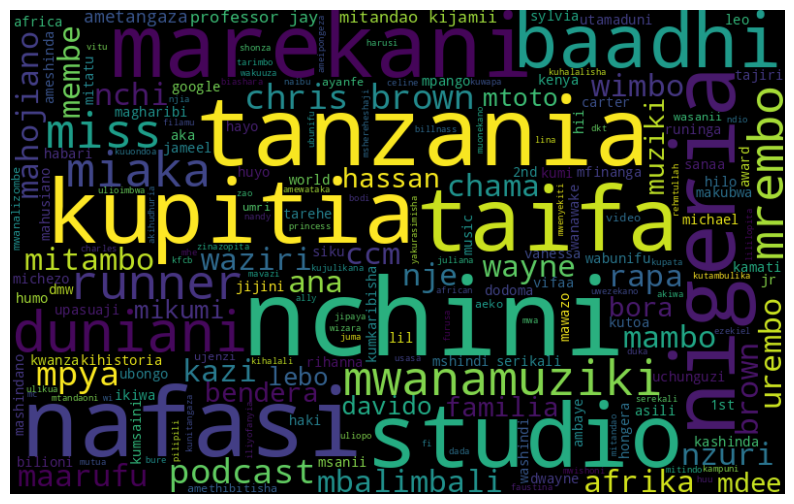

In [ ]:
subset=train[train.category=="Burudani"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

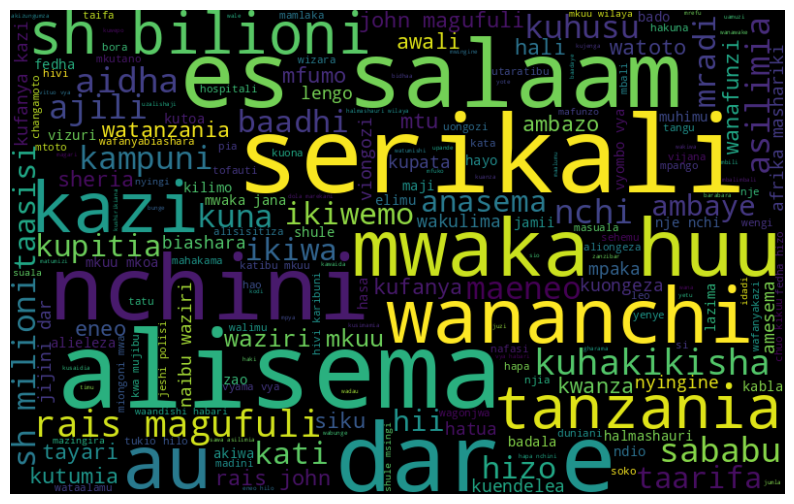

In [ ]:
subset=train[train.category=="Kitaifa"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

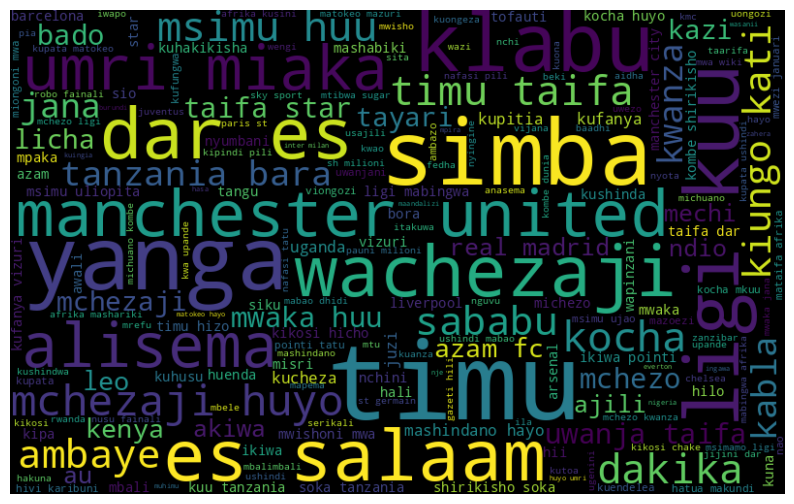

In [ ]:
subset=train[train.category=="michezo"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

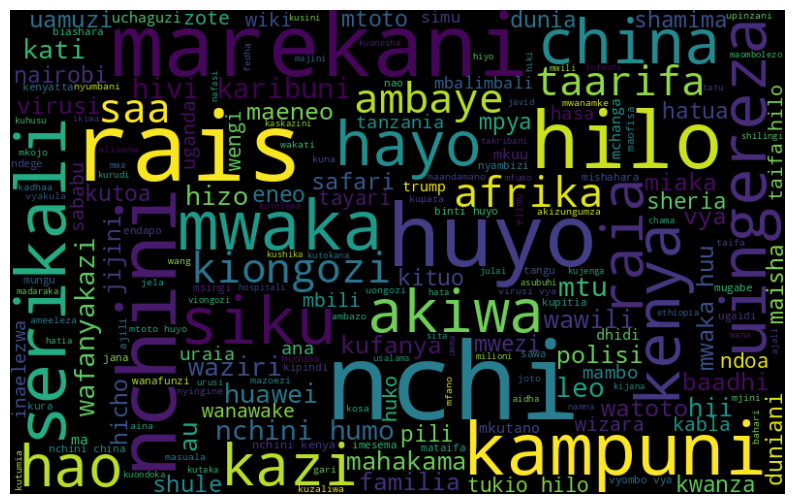

In [ ]:
subset=train[train.category=="Kimataifa"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

# Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['category1']= label_encoder.fit_transform(train['category'])
train.head()

,id,content,category,News_length,category1
0,SW0,serikali imesema haitakuwa tayari kuona amani ...,Kitaifa,1584,3
1,SW1,"mkuu mkoa tabora , aggrey mwanri amesitisha li...",Biashara,1317,0
2,SW10,serikali imetoa miezi sita taasisi zote umma a...,Kitaifa,2610,3
3,SW100,kampuni mchezo kubahatisha m-bet imeingia maku...,michezo,1404,4
4,SW1000,watanzania wamekumbushwa kusherehekea sikukuu ...,Kitaifa,2247,3


# Split the data in Training and testing

In [ ]:
# text preprocessing
X_train, X_test, y_train, y_test = train_test_split(train['content'],
                                                    train['category1'],
                                                    test_size=0.3,
                                                    random_state=42)


  ## Word Embedding

Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers.

TF-IDF
Short term for Term Frequency - Inverse Document Frequency. It breaks a word into two parts TF and IDF.
TF  : Total number of times a term occurs in a document but it tends to emphasize the wrong term sometimes, hence IDF is introduced to balance the term weight.

In [ ]:
#Parameters
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [ ]:
# TF-IDF vectorizer
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2', # L2 normalization
                        sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(3605, 300)
(1546, 300)


In [ ]:
import torch
import wandb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, classification_report
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Initialize Weights & Biases
wandb.init(project="swahili-text-classification")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: arpit-iitmz (arpit-iitmz-iit-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
# Load tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained("benjamin/roberta-base-wechsel-swahili")
model = RobertaForSequenceClassification.from_pretrained("benjamin/roberta-base-wechsel-swahili", num_labels=len(train['category'].unique()))

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/817k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/475k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at benjamin/roberta-base-wechsel-swahili and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define a PyTorch dataset class
class SwahiliNewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(self.texts[idx], truncation=True, padding='max_length', max_length=self.max_length, return_tensors='pt')
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

In [ ]:
# Create dataset objects
train_dataset = SwahiliNewsDataset(X_train.tolist(), y_train.tolist(), tokenizer)
test_dataset = SwahiliNewsDataset(X_test.tolist(), y_test.tolist(), tokenizer)



In [ ]:
# Calculate class weights to handle imbalance
from sklearn.utils.class_weight import compute_class_weight
#class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
#class_weights = torch.tensor(class_weights, dtype=torch.float).to(model.device)


In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float)

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))
        loss = loss_fn(logits, labels)
        if return_outputs:
            return loss, outputs
        else:
            return loss



In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_total_limit=2,
    report_to=["wandb"],
)

In [ ]:
# Use the custom trainer
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

In [ ]:
# Train the model
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Epoch,Training Loss,Validation Loss
1,0.704900,0.344424
2,0.890300,0.339858
3,0.207500,0.345771
4,0.189600,0.467381
5,0.120600,0.481038
6,0.026300,0.552588
7,0.057100,0.628910
8,0.000400,0.585184
9,0.000400,0.639034
10,0.000300,0.686675


TrainOutput(global_step=4510, training_loss=0.16882875044097062, metrics={'train_runtime': 4360.5073, 'train_samples_per_second': 8.267, 'train_steps_per_second': 1.034, 'total_flos': 9485409035827200.0, 'train_loss': 0.16882875044097062, 'epoch': 10.0})

In [ ]:
# Evaluate on test set
eval_results = trainer.evaluate()
print(eval_results)

{'eval_loss': 0.6866753697395325, 'eval_runtime': 49.0873, 'eval_samples_per_second': 31.495, 'eval_steps_per_second': 3.952, 'epoch': 10.0}


In [ ]:
# Get predictions
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, preds)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, preds, average='weighted')
conf_matrix = confusion_matrix(y_test, preds)

In [ ]:
# Log metrics to W&B
wandb.log({"accuracy": accuracy, "precision": precision, "recall": recall, "f1-score": f1})

In [ ]:
# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9140
Precision: 0.9155
Recall: 0.9140
F1 Score: 0.9141


In [ ]:
# Print classification report
print("\nClassification Report:\n", classification_report(y_test, preds, target_names=label_encoder.classes_))


Classification Report:
               precision    recall  f1-score   support

    Biashara       0.92      0.88      0.90       422
    Burudani       0.50      1.00      0.67         2
   Kimataifa       0.75      0.55      0.63        11
     Kitaifa       0.87      0.92      0.89       579
     michezo       0.96      0.94      0.95       532

    accuracy                           0.91      1546
   macro avg       0.80      0.86      0.81      1546
weighted avg       0.92      0.91      0.91      1546



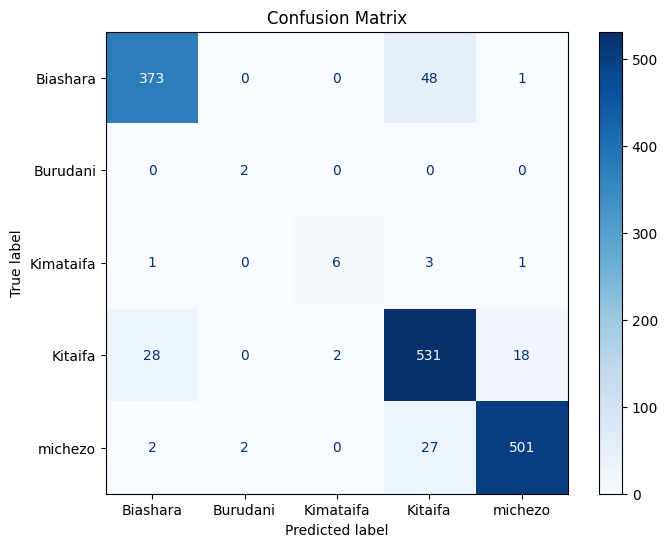

In [ ]:
# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Log confusion matrix to W&B
wandb.log({"confusion_matrix": wandb.Image(fig)})


In [ ]:
# Finish W&B run
wandb.finish()

accuracy,▁
eval/loss,▁▁▁▄▄▅▇▆▇██
eval/runtime,▂▁▁▁▁▁▁▁▁▂█
eval/samples_per_second,▇████████▇▁
eval/steps_per_second,▇████████▇▁
f1-score,▁
precision,▁
recall,▁
test/loss,▁
test/runtime,▁
test/samples_per_second,▁
